In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
t_label.shape

In [ ]:
valid_label.shape

In [1]:
import os
import numpy as np
import pickle
import keras
from matplotlib import pyplot as plt

from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten, LSTM, Embedding, Activation
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Conv1D, Bidirectional
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2 # L2-regularisation
from keras.activations import sigmoid
from keras.models import Model
import tensorflow as tf
import warnings

Using TensorFlow backend.


In [2]:
def load_data(data_name):
    pkl_file = open(data_name + '.pkl', 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

print('Loading data...')
folder = '../input/aminodataset/'

train = load_data(folder + 'train')
train_label = load_data(folder + 'train_label')
test = load_data(folder + 'test')
test_label = load_data(folder + 'test_label')
valid = load_data(folder + 'valid')
valid_label = load_data(folder + 'valid_label')
print('Data are loaded')


Loading data...
Data are loaded


In [ ]:
train.shape, np.shape(train_label), np.shape(test), np.shape(test_label)

In [ ]:
train = train.reshape(train.shape[0], train.shape[1], train.shape[2])
test = test.reshape(test.shape[0], test.shape[1], test.shape[2])
valid = valid.reshape(valid.shape[0], valid.shape[1], valid.shape[2])

## CNN model

In [20]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


warnings.filterwarnings("ignore")


l2_lambda = 0.0001

batch_size = 8
epochs = 30

reg = l2(l2_lambda)
init="he_normal"


def cnn(input_shape, mm, output_shape):

    input_layer = Input(input_shape)
    layer1 = (Conv2D(8, (mm, 5), activation='linear', W_regularizer=l2(l2_lambda), padding='same'))(input_layer)
    layer1 = (LeakyReLU(alpha=0.1))(layer1)
    layer1 = (MaxPooling2D(pool_size=(4, 4),padding='same'))(layer1)
    
    layer1 = (Conv2D(16, (mm, 5), activation='linear', W_regularizer=l2(l2_lambda), padding='same'))(layer1)
    layer1 = (LeakyReLU(alpha=0.1))(layer1)
    layer1 = (MaxPooling2D(pool_size=(4, 4),padding='same'))(layer1)
    layer1 = (Dropout(0.5))(layer1)

    layer4 = (Flatten())(layer1)
    finish = []

#     output = Dense(int((mm ** 2 - mm) / 2), activation='softmax', name='main_output')(layer4)
    for i in range(int((mm ** 2 - mm) / 2)):
        output = Dense(output_shape, activation='softmax', name='main_output'+str(i))(layer4)
        finish.append(output)
        

    model = Model(inputs=[input_layer], outputs=finish)
    model.compile(loss = "categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001))
    
    return model

## cnn1d + bilstm + cnn1d + dense

In [ ]:
# try solution

from keras import regularizers

def bilstm(input_shape, output_shape, mm):
    
    l2_lambda = 0.00001
    
    inputs = Input(input_shape)
    
    layer = Conv1D(128, mm, activation='linear', padding='valid', W_regularizer=l2(l2_lambda))(inputs)
    layer = (Dropout(0.4))(layer)
#     layer = Conv1D(64, mm, activation='linear', padding='valid', W_regularizer=l2(l2_lambda))(layer)
#     layer = (Dropout(0.4))(layer)
#     layer = Conv1D(128, mm, activation='linear', padding='valid', W_regularizer=l2(l2_lambda))(layer)
#     layer = (Dropout(0.4))(layer)
    
    layer = (Flatten())(layer)
    
#     layer = (Bidirectional(LSTM(64, return_sequences=True)))(layer)
#     layer = (Dropout(0.4))(layer)
    
# #     layer = Conv1D(64, mm, activation='linear', padding='valid', W_regularizer=l2(l2_lambda))(layer)
    
#     layer = (Bidirectional(LSTM(128, return_sequences=True)))(layer)
#     layer = (Dropout(0.4))(layer)
    
# #     layer = Conv1D(128, mm, activation='linear', padding='valid', W_regularizer=l2(l2_lambda))(layer)
    
#     layer = (Bidirectional(LSTM(256, return_sequences=True)))(layer)
#     layer = (Dropout(0.4))(layer)
    
#     layer = (Bidirectional(LSTM(512)))(layer)
#     layer = (Dropout(0.4))(layer)
    
#     layer = (Bidirectional(LSTM(1024)))(layer)
#     layer = (Dropout(0.4))(layer)
    
#     output = (Dense(512, activation = 'linear', W_regularizer = l2(l2_lambda)))(layer)
#     output = (LeakyReLU())(output)
#     output = (Dropout(0.5))(output)
    
#     output = (Dense(512, activation = 'linear', W_regularizer = l2(l2_lambda)))(output)
#     output = (LeakyReLU())(output)
#     output = (Dropout(0.5))(output)
    
#     output = (Dense(16, activation = 'linear', W_regularizer = l2(l2_lambda)))(output)
#     output = (LeakyReLU())(output)
#     output = (Dropout(0.4))(output)
    
#     output = (Dense(2, activation = 'softmax', name = 'main_output' + str(i)))(layer)

    finish = []
    for i in range(int((mm ** 2 - mm) / 2)):
        output = (Dense(2, activation = 'softmax', name = 'main_output' + str(i)))(output)
        finish.append(output)

    model = Model(inputs = [inputs], outputs = finish)
    
    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy'
    )
    
    return model

In [21]:
batch_size = 32
epochs = 25
mm = 40

model = cnn((train.shape[1], train.shape[2], 1), mm, 2)

class_weight = {0: 1.,
                1: 5.}

print('Start training...')
history = model.fit(train, list(train_label), batch_size = batch_size, epochs = epochs, verbose = 0,
                          validation_data=(valid, list(valid_label)))

Start training...


In [ ]:
np.shape(train), np.shape(test_label)

In [ ]:
from keras.utils import plot_model
from IPython.display import Image
from matplotlib.pyplot import savefig

model = cnn((train.shape[1], train.shape[2], 1), mm, 2)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model2.png')

# Image(retina=True, filename='model2.png')

# with open("model.png", "wb") as png:
#     png.write(Image())

In [ ]:
no_diag = int((mm ** 2 - mm) / 2) - (2 * mm - 3)
no_main = int((mm ** 2 - mm) / 2)

In [ ]:
print('Start training...')

model = cnn((train.shape[1], train.shape[2], 1), mm, 2)

train_dropout = model.fit(train, list(train_label), batch_size = batch_size, epochs = epochs, verbose = 1,
                          validation_data = (np.array(valid), list(valid_label)))

In [23]:
predicted = model.predict(test)

print(np.shape(predicted))
print(np.shape(test_label))

output = open('cnn' + '.pkl', 'wb')
pickle.dump(predicted, output)
output.close()

output = open('test_label' + '.pkl', 'wb')
pickle.dump(test_label, output)
output.close()

(780, 73, 2)
(780, 73, 2)


In [ ]:
np.shape(predicted)

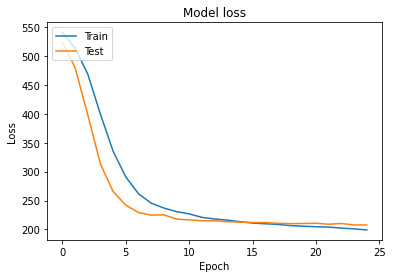

In [22]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
matrix = []

for i in range(predicted.shape[0]):
    mat = []
    for j in range(predicted.shape[1]):
        mat.append(np.argmax(predicted[i][j]))
        
    matrix.append(mat)

In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import operator
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


def score(test_label, predicted, metric):
    
    predicted = np.array(predicted).reshape(780 * 73, 2)
    test_label = np.array(test_label).reshape(780 * 73, 2)
    
    id_score = {}
    pred = []
    test = []
    
    L = []
    L_2 = []
    L_5 = []
    L_10 = []
    
    for i in range(len(predicted)):
        id_score[i] = predicted[i][1]
        
    for key, value in reversed(sorted(id_score.items(), key=operator.itemgetter(1))):
        pred.append(np.argmax([1 - value, value]))
        test.append(np.argmax(test_label[key]))
        
    if metric == 'recall':
        
        L.append(recall_score(test, pred))
        L_2.append(recall_score(test[:len(test) // 2], pred[:len(pred) // 2]))
        L_5.append(recall_score(test[:len(test) // 5], pred[:len(pred) // 5]))
        L_10.append(recall_score(test[:len(test) // 10], pred[:len(pred) // 10]))
        
    elif metric == 'f1':
        
        L.append(f1_score(test, pred))
        L_2.append(f1_score(test[:len(test) // 2], pred[:len(pred) // 2]))
        L_5.append(f1_score(test[:len(test) // 5], pred[:len(pred) // 5]))
        L_10.append(f1_score(test[:len(test) // 10], pred[:len(pred) // 10]))
        
    elif metric == 'precision':
        
        L.append(precision_score(test, pred))
        L_2.append(precision_score(test[:len(test) // 2], pred[:len(pred) // 2]))
        L_5.append(precision_score(test[:len(test) // 5], pred[:len(pred) // 5]))
        L_10.append(precision_score(test[:len(test) // 10], pred[:len(pred) // 10]))
        
    else:
        
        raise ValueError('No metric was found')
            
    return L, L_2, L_5, L_10

In [25]:
def print_results(test_label, proba):
    
    # f1 score
    
    L, L_2, L_5, L_10 = score(test_label, proba, 'f1')
    print('F1 score:')
    print('L:', L)
    print('L_2:', L_2)
    print('L_5:', L_5)
    print('L_10:', L_10)
    
    # precision score
    
    L, L_2, L_5, L_10 = score(test_label, proba, 'precision')
    print('Precision score:')
    print('L:', L)
    print('L_2:', L_2)
    print('L_5:', L_5)
    print('L_10:', L_10)
    
    
    # recall score
    
    L, L_2, L_5, L_10 = score(test_label, proba, 'recall')
    print('Recall score:')
    print('L:', L)
    print('L_2:', L_2)
    print('L_5:', L_5)
    print('L_10:', L_10)

In [26]:
print_results(test_label, predicted)

F1 score:
L: [0.715187969924812]
L_2: [0.7333168866411743]
L_5: [0.8392743700148232]
L_10: [0.946725860155383]
Precision score:
L: [0.8146067415730337]
L_2: [0.8146067415730337]
L_5: [0.8146067415730337]
L_10: [0.898840885142255]
Recall score:
L: [0.6373968049748043]
L_2: [0.6667788245850157]
L_5: [0.8654826029989809]
L_10: [1.0]


In [ ]:
np.shape(test_label), np.shape(predicted)